<a href="https://colab.research.google.com/github/Rtengmiami/Aston9527/blob/main/Tf_idf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [173]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [174]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Data Processing

In [175]:
df = pd.read_csv('/content/drive/MyDrive/NTUST/111-2/AI and analyst/elon_musk_tweets_solve.csv',encoding= 'unicode_escape')
df = df.text.reset_index()
df

,index,text
0,0,@BillyM2k I find the gold toe sock inevitably...
1,1,"Sock Con, the conference for socks"
2,2,Always something new for the magazine cover an...
3,3,@ExplainThisBob This guy gets it
4,4,Sock tech is so advanced that you can get pret...
...,...,...
3497,3497,@KanekoaTheGreat @DavidSacks @amuse Major problem
3498,3498,@micsolana Exactly
3499,3499,@masegoslin @Tesla Nice work
3500,3500,@JaromeBellVA Agreed


In [176]:
import re
df['text']= df['text'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])
#去除網站
len(df.index)

3502

In [177]:
def flatten_list(lst):
    result = []
    for elem in lst:
        if isinstance(elem, list):
            result.extend(flatten_list(elem))
        else:
            result.append(elem)
    return result
#df中存在double list

In [178]:
context = [d.split() for d in df['text']]
context = flatten_list(context)
context
#分詞

['@BillyM2k',
 'I',
 'find',
 'the',
 'gold',
 'toe',
 'sock',
 'inevitably',
 'off',
 'kilter',
 '&amp;',
 'washed',
 'out',
 'a',
 'little',
 'troubling',
 'esthetically',
 '&amp;',
 'arguably',
 'a',
 'bit',
 'corpo',
 'Sock',
 'Con,',
 'the',
 'conference',
 'for',
 'socks',
 'Always',
 'something',
 'new',
 'for',
 'the',
 'magazine',
 'cover',
 'and',
 'the',
 'articles',
 'practically',
 'write',
 'themselves',
 '@ExplainThisBob',
 'This',
 'guy',
 'gets',
 'it',
 'Sock',
 'tech',
 'is',
 'so',
 'advanced',
 'that',
 'you',
 'can',
 'get',
 'pretty',
 'much',
 'anything',
 'in',
 'sock',
 'form',
 'these',
 'days!',
 'I',
 'must',
 'confess',
 'to',
 'a',
 'penchant',
 'for',
 'creative',
 'socks',
 '@slashdot',
 'Its',
 'time',
 '@TonyadeVitti',
 '@historydefined',
 'His',
 'success',
 'was',
 'in',
 'fact',
 'due,',
 'in',
 'part,',
 'because',
 'he',
 'was',
 'super',
 'fun',
 'at',
 'parties,',
 'spoke',
 'and',
 'wrote',
 'incredibly',
 'well!',
 '@historydefined',
 'While'

In [179]:
#計算每一句總詞數
# text_index = [l for l in df.index]
from collections import Counter
import math
text= [d for d in df['text']]

# for k in text:
#   fre = Counter(k)
#   print(fre)
# count()
idf_count={}
dict1_tf = {}
num = 0

for i in text: 
  tf={}
  words = "".join(i.lower()).split()
  words_count = Counter(words)
  for word,count in words_count.items():
    if word not in tf:
      tf[word]=[]
    if word in tf:
      tf[word]=count/len(words)
    if word not in idf_count:
      idf_count[word]=[]
    if word in idf_count:
      if count>1:
        count=1
      idf_count[word]=count     
     
  dict1_tf[num]=tf
  num+=1
idf = idf_count.copy()
#出來有完整tf idf的次數
for k,v in idf.items():
  idf[k]=math.log(len(text)/v)
#tf x idf
for key in dict1_tf:
  for subkey in dict1_tf[key]:
    if subkey in idf:
      dict1_tf[key][subkey]*=idf[subkey]
  

  # dict(words_count)
  # for words
  
  # for j in range(len(words)):
    # print()
  # dict1 = words_count|dict1(python 3. 9+)
  # dict1.update({"Index":num,"Value":words_count})
  # dict1.append({'index':num,"TF":words_count}
  # for word,count in words_count.items():

  #   if word not in tf:
  #     tf.setdefault(word,words_count[word])
  #   if word in tf:
  #     for key in word:
  #       tf.update({key:count/len(words)})
  #   # tf[word] =words_count[word]
    #   tf[word]=[]
    #   tf[word].append(count/len(words))
    # print(a)
# words_count
#用兩個dict 去裝 Ex: {1:{i:1,off:2,find:3}}

dict1_tf

{0: {'@billym2k': 0.3709586142202635,
  'i': 0.3709586142202635,
  'find': 0.3709586142202635,
  'the': 0.3709586142202635,
  'gold': 0.3709586142202635,
  'toe': 0.3709586142202635,
  'sock': 0.3709586142202635,
  'inevitably': 0.3709586142202635,
  'off': 0.3709586142202635,
  'kilter': 0.3709586142202635,
  '&amp;': 0.741917228440527,
  'washed': 0.3709586142202635,
  'out': 0.3709586142202635,
  'a': 0.741917228440527,
  'little': 0.3709586142202635,
  'troubling': 0.3709586142202635,
  'esthetically': 0.3709586142202635,
  'arguably': 0.3709586142202635,
  'bit': 0.3709586142202635,
  'corpo': 0.3709586142202635},
 1: {'sock': 1.3601815854742993,
  'con,': 1.3601815854742993,
  'the': 1.3601815854742993,
  'conference': 1.3601815854742993,
  'for': 1.3601815854742993,
  'socks': 1.3601815854742993},
 2: {'always': 0.6277761163727537,
  'something': 0.6277761163727537,
  'new': 0.6277761163727537,
  'for': 0.6277761163727537,
  'the': 1.2555522327455073,
  'magazine': 0.62777611637

In [180]:
#從tf x idf 結果中找出top10
top_count=Counter()
for sub_dict in dict1_tf.values():
  top_count.update(sub_dict)
sort_result = sorted(top_count.items(),key = lambda x:x[1],reverse= True)

top10 =sort_result[:20]
x_data = [item[0] for item in top10]
y_data = [item[1] for item in top10]



<BarContainer object of 20 artists>

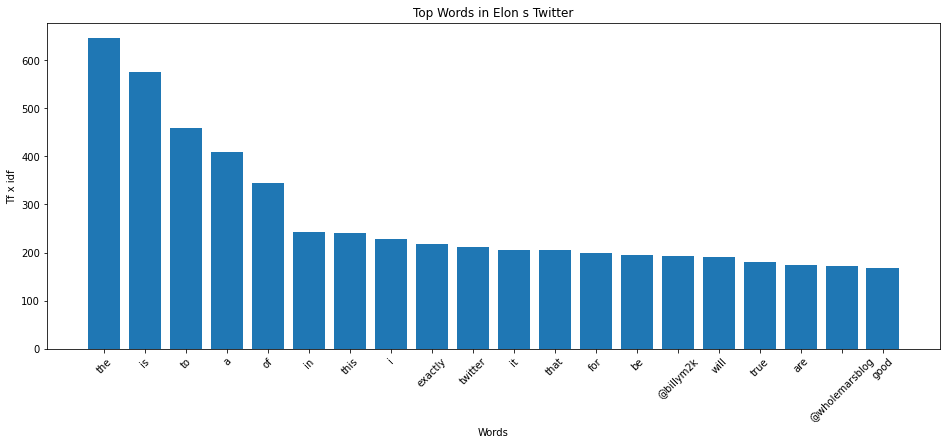

In [181]:
plt.figure(figsize=(16,6))
plt.xticks(rotation=45)
plt.title('Top Words in Elon s Twitter')
plt.xlabel('Words')
plt.ylabel('Tf x idf')

plt.bar(x_data,y_data)

ValueError: ignored

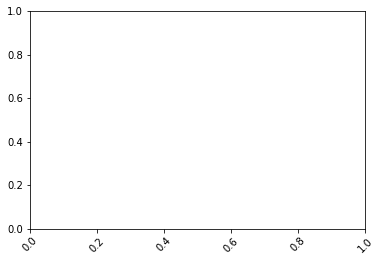

In [159]:
plt.xticks(rotation=45)
pic1 = sns.scatterplot(data = top10,x = "Context", y = "Post Number")

In [ ]:
# idf={}
total_sen = len(df.index)
total_words =Counter(flatten_list([k.split() for k in text]) )
idf = dict(total_words)
idf

5

In [ ]:
#讓每個詞都有一個Post number
text= [d for d in df['text']]
text_index = [l for l in df.index]

word_count_list = [len(sentence.split()) for sentence in text]
output_list = []

for i, count in enumerate(word_count_list):
    for j in range(count):
        output_list.append(text_index[i])

output_list

In [ ]:
tf= {}
for i in context:
  if i not in tf:
    tf[i] ={}

In [ ]:
#solution from chatGPT
# columnA = [x for x in range(3)]
# columnB = ["apple is good","banana is good","cat is good enough"]

# word_count_list = [len(sentence.split()) for sentence in columnB]
# output_list = []

# for i, count in enumerate(word_count_list):
#     for j in range(count):
#         output_list.append(columnA[i])

# print(output_list)


[0, 0, 0, 1, 1, 1, 2, 2, 2, 2]


In [ ]:
new_df = pd.DataFrame({"Post Number":output_list,"Context":context})
new_df

,Post Number,Context
0,0,@BillyM2k
1,0,I
2,0,find
3,0,the
4,0,gold
...,...,...
35441,3499,work
35442,3500,@JaromeBellVA
35443,3500,Agreed
35444,3501,@tobyordoxford


In [ ]:
#Top20出現的字
count = new_df.groupby(['Context']).count()
count = count.sort_values(["Post Number"],ascending = False )
fig1 = count.iloc[:50]
fig1= fig1.index.tolist()
fig1

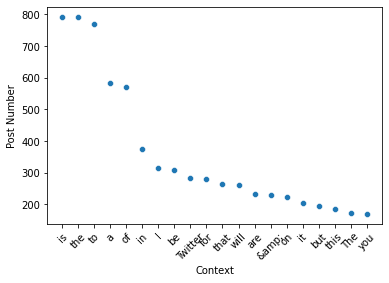

In [ ]:
plt.xticks(rotation=45)
pic1 = sns.scatterplot(data = fig1,x = "Context", y = "Post Number")
# pic1.set_xticklabels(axis = "Context",rotation=30)


In [ ]:
import pandas as pd
import numpy as np
import math

# Load the data
data = pd.read_csv('/content/drive/MyDrive/NTUST/111-2/AI and analyst/elon_musk_tweets_solve.csv',encoding= 'unicode_escape')

# Calculate the term frequency (TF) for each word in each document
tf = {}
for i in range(len(data)):
    words = data['text'].iloc[i].split()
    for word in words:
        if word not in tf:
            tf[word] = {}
        if i not in tf[word]:
            tf[word][i] = 0
        tf[word][i] += 1

# Calculate the inverse document frequency (IDF) for each word
idfs = {}
for word in tf:
    idfs[word] = math.log(len(data) / len(tf[word]))

# Calculate the TF-IDF for each word in each document
tf_idf = np.zeros((len(data), len(tf)))
for i in range(len(data)):
    words = data['text'].iloc[i].split()
    for j, word in enumerate(tf):
        if i in tf[word]:
            tf_idf[i, j] = tf[word][i] * idfs[word]

# Print the results
print(tf_idf)


[[3.22661558 2.51918244 5.85850442 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 8.16108951 0.         0.        ]
 [0.         0.         0.         ... 0.         8.16108951 0.        ]
 [0.         0.         0.         ... 0.         0.         8.16108951]]


In [ ]:
import pandas as pd
import math

# Load data
data = pd.read_csv('/content/drive/MyDrive/NTUST/111-2/AI and analyst/elon_musk_tweets_solve.csv',encoding= 'unicode_escape')

# Calculate total number of documents
num_docs = len(data)

# Create a dictionary to store the term frequencies for each document
tf = {}

# Loop through the documents and tokenize the text
for i in range(num_docs):
    text = data['text'].iloc[i]
    tokens = text.lower().split()
    
    # Calculate the term frequency for each token in the document
    for token in tokens:
        if token not in tf:
            tf[token] = {}
        if i not in tf[token]:
            tf[token][i] = 0
        tf[token][i] += 1

# Calculate IDF values
idf = {}
for word in tf:
    idf[word] = math.log10(num_docs / len(tf[word]))

# Get top 50 words by TF
top_tf = {}
for word in tf:
    top_tf[word] = sum(tf[word].values())
top_tf = dict(sorted(top_tf.items(), key=lambda item: item[1], reverse=True)[:50])

Print top 50 words and their IDF values
for word in top_tf:
    print(word, tf[word], idf[word])




TypeError: ignored

In [ ]:
# count = new_df.groupby(['Context']).count()
# count = count.sort_values(["Post Number"],ascending = False )
# hastage= count["Post Number"].astype(str).str.contains(r'\b@\b', regex=True)
# hastage.iloc[:50]

In [ ]:
import pandas as pd
import math
from collections import Counter

# Load the data
df = pd.read_csv('/content/drive/MyDrive/NTUST/111-2/AI and analyst/elon_musk_tweets_solve.csv',encoding= 'unicode_escape')
df = df.text.reset_index()
import re
df['text']= df['text'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])
def flatten_list(lst):
    result = []
    for elem in lst:
        if isinstance(elem, list):
            result.extend(flatten_list(elem))
        else:
            result.append(elem)
    return result
context = [d.split() for d in df['text']]
context = flatten_list(context)
text= [d for d in df['text']]
text_index = [l for l in df.index]

word_count_list = [len(sentence.split()) for sentence in text]
output_list = []

for i, count in enumerate(word_count_list):
    for j in range(count):
        output_list.append(text_index[i])

new_df = pd.DataFrame({"Post Number":output_list,"Context":context})

# Calculate the term frequency (tf) for each word in each document
tf = {}
for i, doc in enumerate(text):
    words = doc.lower().split()
    word_counts = Counter(words)
    total_words = len(words)
    for word, count in word_counts.items():
        if word not in tf:
            tf[word] = {}
        tf[word][i] = count / total_words

# Calculate the inverse document frequency (idf) for each word
idf = {}
num_docs = len(text)
for word in tf:
    num_docs_containing_word = len(tf[word])
    idf[word] = math.log(num_docs / (1 + num_docs_containing_word))

# Calculate the tf-idf scores for each word in each document
tf_idf = {}
for word in tf:
    for i, freq in tf[word].items():
        tf_idf_val = freq * idf[word]
        if i not in tf_idf:
            tf_idf[i] = {}
        tf_idf[i][word] = tf_idf_val

# Get the top 50 words based on their tf-idf scores
top_50_words = []
for word in sorted(idf, key=idf.get, reverse=True)[:50]:
    top_50_words.append((word, idf[word]))
    
# Print the top 50 words and their tf-idf scores
for i, (word, score) in enumerate(top_50_words):
    print(f"{i+1}. {word}: {score}")


1. toe: 7.467942332285852
2. inevitably: 7.467942332285852
3. kilter: 7.467942332285852
4. washed: 7.467942332285852
5. esthetically: 7.467942332285852
6. con,: 7.467942332285852
7. conference: 7.467942332285852
8. magazine: 7.467942332285852
9. cover: 7.467942332285852
10. practically: 7.467942332285852
11. confess: 7.467942332285852
12. penchant: 7.467942332285852
13. due,: 7.467942332285852
14. part,: 7.467942332285852
15. well!: 7.467942332285852
16. bleak: 7.467942332285852
17. clicks,: 7.467942332285852
18. happier: 7.467942332285852
19. moments: 7.467942332285852
20. wherever: 7.467942332285852
21. brought: 7.467942332285852
22. 69,: 7.467942332285852
23. @alexberenson: 7.467942332285852
24. this:: 7.467942332285852
25. pressures: 7.467942332285852
26. ¦â: 7.467942332285852
27. lifetime: 7.467942332285852
28. flatulence: 7.467942332285852
29. earther: 7.467942332285852
30. zip: 7.467942332285852
31. vegas: 7.467942332285852
32. tunnels!: 7.467942332285852
33. structural: 7.46794

##計算


計算要寫def for tf idf
可以參考https://github.com/MorvanZhou/NLP-Tutorials/blob/3aa02a13151b696e8c034da5f7bd2ef4294a5e5f/tf_idf.py#L3

In [ ]:
# def 
# tf = lambdx x :np.log(1+x)
